# Topology of Patches

When declaring the topology of the patches is important to indicate the connection between patches and the faces for the boundary conditions

content:

* [Anticline model](#anticline)
    * [Creation of patches](#patches)
    * [Assign positions in grid](#position)
    * [Assign topology](#topology)
    
* [Fault model](#Fault)
    * [Creation of patches](#patches2)
    * [Assign positions in grid](#position2)
    * [Assign topology](#topology2)

In [20]:
import numpy as np

<a id='anticline'></a>
# Anticline

<a id='patches'></a>
## 1) Creation of patches

In [21]:
from pygeoiga.nurb.nurb_creation import NURB

In [22]:
# Create multipatch structure
cp1 = np.array([[[0., 0.], [0.,  50.], [0., 100.]],
                [[250., 0.], [250., 180.], [250., 250.]],
                [[500.,   0.], [500.,  50.], [500., 100.]]])
knot1 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb1 = NURB(cp1, knot1)
cp2=np.array([[[0., 100.], [0., 200.], [0., 300.]],
                       [[250., 250.], [250., 350.], [250., 400.]],
                       [[500., 100.], [500., 200.], [500., 300.]]])
knot2= [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]
nrb2 = NURB(cp2, knot2)

cp3 = np.array([[[0., 300.], [0., 400.], [0., 500.]],
                        [[250., 400.], [250., 450.], [250., 500.]],
                        [[500., 300.], [500., 400.], [500., 500.]]])
knot3 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb3 = NURB(cp3, knot3)

In [23]:
from pygeoiga.nurb.multipatch_NURBS import Multipatch

In [24]:
mult = Multipatch()

<a id='position'></a>
## 2) Assign position of patches in a grid

The most important aspect is defining the position of the patch. This should be done in a grid that starts in the lower left side. Then, this will allow to construct the connection between faces

In [25]:
mult.add_patch(nrb1, "Bottom", position=(1,1))
mult.add_patch(nrb2, "Middle", position=(2,1))
mult.add_patch(nrb3, "Top", position=(3,1))

In [26]:
#just for illustrative purposes
for name in mult.geometry.keys():
    print(name, mult.geometry[name].get("patch_faces"))

{}
{}
{}


<a id='topology'></a>
## 3) Assign topology

In [27]:
mult.define_topology()

In [28]:
#just for illustrative purposes
# BOUNDARIES - faces of the patch in contact
# 0: down
# 1: right
# 2: up
# 3: left

for name in mult.geometry.keys():
    print(name, mult.geometry[name].get("patch_faces"))

{2: 'Middle'}
{0: 'Bottom', 2: 'Top'}
{0: 'Middle'}


<AxesSubplot:>

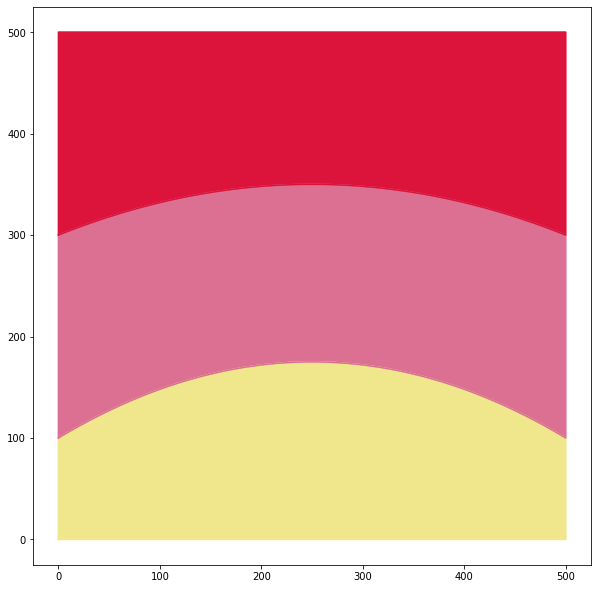

In [30]:
mult.plot_surfaces()

<a id='Fault'></a>
# Fault Model

<a id='patches2'></a>
## 1) Create patches

In [31]:
# Create multipatch structure
c_d1 = np.array([[[0, 0], [0, 100], [0, 200]],
                          [[50, 0], [85.5, 100], [121, 200]],
                          [[100, 0], [171, 100], [242, 200]]])
k_d1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d1 = NURB(c_d1, k_d1)

c_d2 = np.array([[[100, 0], [171, 100], [242, 200]],
                 [[550, 0], [585.5, 100], [621, 200]],
                 [[1000, 0], [1000,  100], [1000,  200]]])
k_d2 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d2 = NURB(c_d2, k_d2)

c_d3 = np.array([[[0, 200], [0, 250], [0, 300]],
                 [[121, 200], [138, 250], [155, 300]],
                 [[242, 200],  [276, 250], [310, 300]]])
k_d3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d3 = NURB(c_d3, k_d3)

c_d4 = np.array([[[ 242,  200], [ 276.,  250.], [ 310.,  300]],
                 [[ 621.,  200.], [ 638.,  250], [ 655.,  300.]],
                 [[1000.,  200.], [1000.,  250.], [1000.,  300.]]])
k_d4 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d4 = NURB(c_d4, k_d4)

c_d5 = np.array([[[  0., 300], [  0., 500], [  0., 700.]],
                 [[155., 300.], [225., 500.], [295., 700.]],
                 [[310., 300.], [450., 500], [590., 700]]])
k_d5 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d5 = NURB(c_d5, k_d5)

c_d6 = np.array([[[ 310.,  300], [ 450.,  500], [ 590.,  700]],
                 [[ 655.,  300], [ 725.,  500], [ 795.,  700]],
                 [[1000.,  300], [1000.,  500], [1000.,  700]]])
k_d6 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d6 = NURB(c_d6, k_d6)

c_d7 = np.array([[[  0. , 700], [  0. , 750], [  0. , 800.]],
                 [[295. , 700], [312.5, 750], [330. , 800]],
                 [[590. , 700], [625. , 750], [660. , 800]]])
k_d7 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d7 = NURB(c_d7, k_d7)

c_d8 = np.array([[[ 590. ,  700], [ 625. ,  750], [ 660. ,  800]],
              [[ 795. ,  700], [ 812.5,  750], [ 830. ,  800]],
              [[1000. ,  700], [1000. ,  750], [1000. ,  800]]])
k_d8 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d8 = NURB(c_d8, k_d8)

c_d9 = np.array([[[   0.,  800], [   0.,  900], [ 0., 1000]],
                 [[ 330.,  800], [ 365.,  900], [ 400., 1000]],
                  [[660.,  800], [ 730.,  900], [ 800., 1000]]])
k_d9 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d9 = NURB(c_d9, k_d9)

c_d10 = np.array([[[ 660.,  800.], [ 730.,  900], [ 800., 1000]],
                  [[ 830.,  800], [ 865.,  900], [ 900., 1000]],
                  [[1000.,  800], [1000.,  900], [1000., 1000]]])
k_d10 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
nrb_d10 = NURB(c_d10, k_d10)


In [33]:
mult2 = Multipatch()

<a id='position2'></a>
## 2) Assign position of patches in a grid

In [46]:
mult2.add_patch(nrb_d1, "d1", position=(1,1))
mult2.add_patch(nrb_d2, "d2", position=(1,2))
mult2.add_patch(nrb_d3, "d3", position=(2,1))
mult2.add_patch(nrb_d4, "d4", position=(2,2))
mult2.add_patch(nrb_d5, "d5", position=(3,1))
mult2.add_patch(nrb_d6, "d6", position=(3,2))
mult2.add_patch(nrb_d7, "d7", position=(4,1))
mult2.add_patch(nrb_d8, "d8", position=(4,2))
mult2.add_patch(nrb_d9, "d9", position=(5,1))
mult2.add_patch(nrb_d10, "d10", position=(5,2))

In [47]:
#just for illustrative purposes
for name in mult2.geometry.keys():
    print(name, mult2.geometry[name].get("patch_faces"))

d1 {}
d2 {}
d3 {}
d4 {}
d5 {}
d6 {}
d7 {}
d8 {}
d9 {}
d10 {}


<a id='topology2'></a>
## 3) Assign topology

In [48]:
mult2.define_topology()

In [49]:
# BOUNDARIES - faces of the patch in contact
# 0: down
# 1: right
# 2: up
# 3: left

for name in mult2.geometry.keys():
    print(name, mult2.geometry[name].get("patch_faces"))

d1 {1: 'd2', 2: 'd3'}
d2 {3: 'd1', 2: 'd4'}
d3 {0: 'd1', 1: 'd4', 2: 'd5'}
d4 {0: 'd2', 3: 'd3', 2: 'd6'}
d5 {0: 'd3', 1: 'd6', 2: 'd7'}
d6 {0: 'd4', 3: 'd5', 2: 'd8'}
d7 {0: 'd5', 1: 'd8', 2: 'd9'}
d8 {0: 'd6', 3: 'd7', 2: 'd10'}
d9 {0: 'd7', 1: 'd10'}
d10 {0: 'd8', 3: 'd9'}


<AxesSubplot:>

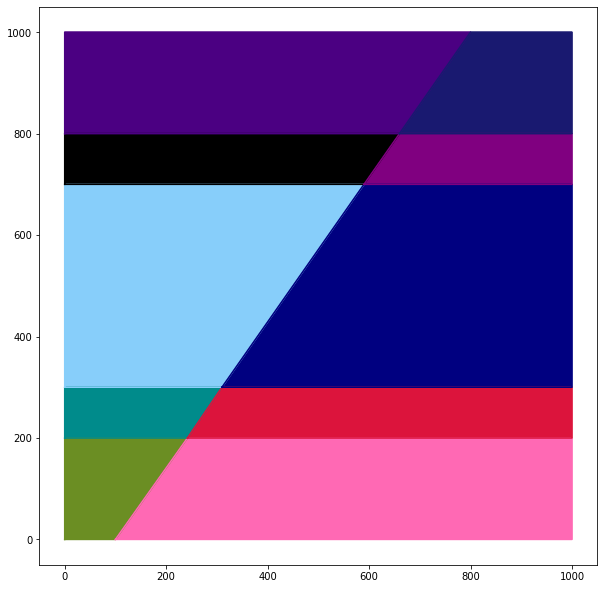

In [50]:
mult2.plot_surfaces()